The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


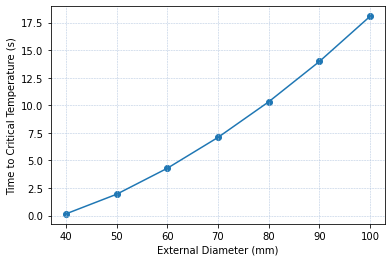

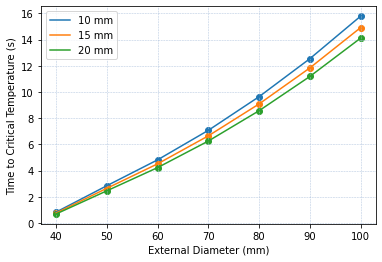

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Material properties

rho = 8920
Cp = 385
T_crit = [865.25,	862.5,	858.75,	852.25,	839,	804,	597]
Ti = 298
T_free = 2066.9749
D = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04]
Dmm = [100, 90, 80, 70, 60, 50, 40]
k = 401

# Combustion chamber

ID_cc = 38.13/1000
h_cc = 4116.3
L = 0.07577
V_cc = []
As_cc = math.pi * ID_cc * L
Lc_cc = [] # Characteristic length
Bi_cc = [] # Biot number
b = []
t = []

for i in range(len(D)):
    V_cc.append(math.pi * (D[i]/2)**2 * L - math.pi * (ID_cc/2)**2 * L)
    Lc_cc.append(V_cc[i] / As_cc)
    Bi_cc.append(h_cc * Lc_cc[i] / k)
    b.append(h_cc * As_cc / (rho * V_cc[i] * Cp))
    t.append(- 1 / b[i] * math.log((T_crit[i] - T_free) / (Ti - T_free)))
    
    
plt.figure()
plt.plot(Dmm, t)
plt.scatter(Dmm, t)
plt.xlabel("External Diameter (mm)")
plt.ylabel("Time to Critical Temperature (s)")
plt.grid(visible=True, which='both', axis='both', color='lightsteelblue', linestyle='--', linewidth=0.5)

# Throat

# Volumes and surface areas taken from CAD model

h_t = 10253
T_free_t = 1815.3709

# 10 mm

V_t10 = [7.44335E-05, 5.95109E-05, 4.61591E-05, 3.43781E-05, 2.4168E-05, 1.55286E-05, 8.46001E-06]
As_t10 = 0.000739539
Lc_t10 = [] # Characteristic length
Bi_t10 = [] # Biot number
b_t10 = []
t_t10 = []

for i in range(len(D)):
    Lc_t10.append(V_t10[i] / As_t10)
    Bi_t10.append(h_t * Lc_t10[i] / k)
    b_t10.append(h_t * As_t10 / (rho * V_t10[i] * Cp))
    t_t10.append(- 1 / b_t10[i] * math.log((T_crit[i] - T_free_t) / (Ti - T_free_t)))
    
# 15 mm

V_t15 = [0.000111212, 8.88277E-05, 6.88001E-05, 5.11286E-05, 3.58133E-05, 2.28543E-05, 1.22514E-05]
As_t15 = 0.0011695
Lc_t15 = [] # Characteristic length
Bi_t15 = [] # Biot number
b_t15 = []
t_t15 = []

for i in range(len(D)):
    Lc_t15.append(V_t15[i] / As_t15)
    Bi_t15.append(h_t * Lc_t15[i] / k)
    b_t15.append(h_t * As_t15 / (rho * V_t15[i] * Cp))
    t_t15.append(- 1 / b_t15[i] * math.log((T_crit[i] - T_free_t) / (Ti - T_free_t)))
    
# 20 mm

V_t20 = [0.00014755, 0.000117705, 9.10017E-05, 6.74397E-05, 4.70194E-05, 2.97406E-05, 1.56034E-05]
As_t20 = 0.00163999
Lc_t20 = [] # Characteristic length
Bi_t20 = [] # Biot number
b_t20 = []
t_t20 = []

for i in range(len(D)):
    Lc_t20.append(V_t20[i] / As_t20)
    Bi_t20.append(h_t * Lc_t20[i] / k)
    b_t20.append(h_t * As_t20 / (rho * V_t20[i] * Cp))
    t_t20.append(- 1 / b_t20[i] * math.log((T_crit[i] - T_free_t) / (Ti - T_free_t)))
    
plt.figure()
plt.plot(Dmm, t_t10, label = "10 mm")
plt.scatter(Dmm, t_t10)
plt.plot(Dmm, t_t15, label = "15 mm")
plt.scatter(Dmm, t_t15)
plt.plot(Dmm, t_t20, label = "20 mm")
plt.scatter(Dmm, t_t20)
plt.xlabel("External Diameter (mm)")
plt.ylabel("Time to Critical Temperature (s)")
plt.grid(visible=True, which='both', axis='both', color='lightsteelblue', linestyle='--', linewidth=0.5)
plt.legend()